# Manchurian Script Reader

### An Efficient Method to Extract Units of Manchu Characters

1. Aaron Daniel Snowberger [aaron.snowberger@gmail.com](mailto:aaron.snowberger@gmail.com)
2. Choong Ho Lee [chlee@hanbat.ac.kr](mailto:chlee@hanbat.ac.kr)

#### Abstract

Since Manchu characters are written vertically and are connected without spaces within a word, a preprocessing
process is required to separate the character area and the units that make up the characters before recognizing the
characters. In this paper, we describe a preprocessing method that extracts the character area and cuts off the unit of the character. Unlike existing research that presupposes a method of recognizing each word or character unit, or recognizing the remaining part after removing the stem of a continuous character, this method cuts the character into each recognizable unit and then combines the units. It can be applied to the method of recognizing letters. Through an experiment, the effectiveness of this method was verified.

##### Keywords

Manchu Characters, Character Recognition, Preprocessing, Pattern Recognition

In [3]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

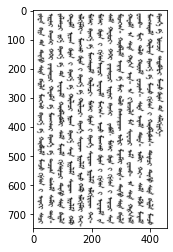

Image shape:  (748, 459)


In [5]:
# Manchurian script image source
scriptSrc = cv2.imread('./img/manchu01.jpg', cv2.IMREAD_GRAYSCALE)

# Let's take a look at the image
plt.imshow(scriptSrc, cmap = plt.get_cmap('gray'))
plt.show()

# And check out its dimensions
height, width = scriptSrc.shape
print("Image shape: ", scriptSrc.shape)

In [48]:
# Actually, let's create some variables HERE that we can use later
scriptLines = []
scriptWords = []
scriptLetters = []

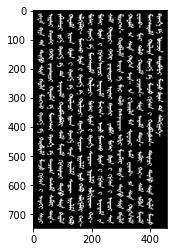

In [49]:
# Create an array with the data from the cols of the image
cols = np.full(width, 0)
# Create binary image (only 1s and 0s) using threshold
ret, bin = cv2.threshold(scriptSrc, 0, 255,
                         cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# inverse binary image (black bg, white txt)
ibin = cv2.bitwise_not(bin)

# Let's take a look at the inverted image
plt.imshow(ibin, cmap = plt.get_cmap('gray'))
plt.show()

In [50]:
# For every col, find anything with data (a pixel of the script)
for i in range(width):
    cols[i] = cv2.countNonZero(ibin[:, i])
    
# Var to hold num of font areas (vertical lines of text) based on the script
n_fontarea = 0

# Determine font areas by checking where a non-zero col ends and a zero col begins
for i in range(width - 1):
    if cols[i] > 0 and cols[
            i + 1] == 0:  # here, our script ends, and whitespace begins
        n_fontarea = n_fontarea + 1  # so, it's the end of a n_fontarea (+1)

# Tell me how many font areas there are (i.e. how many vertical lines of text)
print("Number of font areas = ", n_fontarea)

Number of font areas =  13


In [51]:
# Make a copy of the cols to manipulate it
bcols = cols.copy()

# Kind of like using ReLU (Rectified Linear Unit) to return either a 1 if data exists, or a 0 if no data exists
for i in range(width):
    if cols[i] > 0:  # if some data exists in this col
        bcols[i] = 1  # then set bcols at the same location to 1 (binary)

# Setup image cut points (x axis value) for +1 greater than the number of fontareas
# so that we can cut AROUND each column of text.
# i.e. 13 columns of text requires 14 lines (cut points) to divide them
cutXpoints = np.full(n_fontarea + 1, 0)
# print('cutXpoints = ', cutXpoints) # cutXpoints =  [0 0 0 0 0 0 0 0 0 0 0 0 0 0]

cutXpoints =  [  6  44  78 112 146 180 214 248 281 316 350 383 417 453]


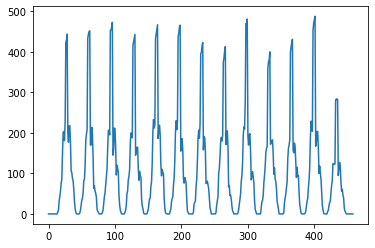

In [52]:
# Initialize variables
j = 0  # cutXpoints counter (we have 14 cut points)
startpoint = 0  # start at the beginning of the image (col 0)

# Loop to determine and set our cutXpoints (where to cut the image for each column of text)
for i in range(1, width):  # start at 1, end at width
    # The first case is the END of the image (width - 1) i.e. if 458 == 458
    if i == width - 1:
        endpoint = i
        cutXpoints[j] = (
            startpoint + endpoint
        ) // 2  # / is floating point division, // is integer division (floor - rounding down)
    # Case 2 is the START of a cut point, i.e. the first col is all 0s (whitespace) and the second col is 1 (script)
    elif bcols[i - 1] == 0 and bcols[i] == 1:
        endpoint = i - 1  # don't cut off the script, cut outside it
        cutXpoints[j] = (startpoint + endpoint) // 2
        j = j + 1  # increment cutXpoints counter
    # Case 3 is the END of a cut point, i.e. the first col has script (1), and the second col is all 0s (whitespace)
    elif bcols[i - 1] == 1 and bcols[i] == 0:
        startpoint = i  # in this case, adjust the startpoint to the current column

# Confirm our points
print("cutXpoints = ", cutXpoints)

# And take a look at the cutXpoints in a graph
plt.plot(cols)
plt.show()

In [53]:
# Now, using the cutXpoints we determined, cut out and display one column of text (change array values)
for i in range(0, len(cutXpoints) - 1):
    # print('cutXpoint #', i)
    cutline = bin[0:height, cutXpoints[i]:cutXpoints[i + 1]]
    scriptLines.append(cutline)
    # print('writing img', i)
    filename = './img/lines/manchu01-' + str(i) + '.jpg'
    cv2.imwrite(filename, cutline)
    # print('finished img', i)

print('Number of Lines cut: ', len(scriptLines))

Number of Lines cut:  13


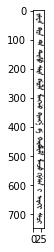

In [54]:
# Let's display ONE column of cut text
plt.imshow(scriptLines[0], cmap = plt.get_cmap('gray'))
plt.show()

# Find Words

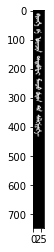

In [55]:
# The following is going to be one long loop for each of our lines of text
# Although in the Jupyter Notebook, it only runs all the scriptLines through this cell's code
# not all the following lines of code as well
for line in range(0, len(scriptLines)):
    rows = np.full(height, 0)
    iline = cv2.bitwise_not(scriptLines[line])
    
    plt.imshow(iline, cmap = plt.get_cmap('gray')) # this displays the last image in the loop

In [56]:
    for i in range(height):
        rows[i] = cv2.countNonZero(iline[i, :])

    # Var to hold num of word areas in column 1
    n_wordarea = 0

    for i in range(height - 1):
        if rows[i] > 0 and rows[i + 1] == 0:
            n_wordarea = n_wordarea + 1

    print("Number of words in line ", line + 1, " = ", n_wordarea) # Add one because we started with 0

Number of words in line  13  =  10


In [57]:
    brows = rows.copy()

    for i in range(height):
        if rows[i] > 0:
            brows[i] = 1

    cutYpoints = np.full(n_wordarea + 1, 0)

cutYpoints in line  13  =  [  5  60  85 151 229 277 321 353 424 429 590]


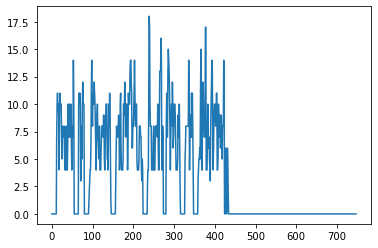

In [58]:
    j = 0
    startpoint = 0

    for i in range(1, height):
        if i == height - 1:
            endpoint = i
            cutYpoints[j] = (startpoint + endpoint) // 2
        elif brows[i - 1] == 0 and brows[i] == 1:
            endpoint = i - 1
            cutYpoints[j] = (startpoint + endpoint) // 2
            j = j + 1
        elif brows[i - 1] == 1 and brows[i] == 0:
            startpoint = i

    print("cutYpoints in line ", line + 1, " = ", cutYpoints)
    
    # Now, let's take a look at the cutYpoints we found in a graph
    plt.plot(rows)
    plt.show()

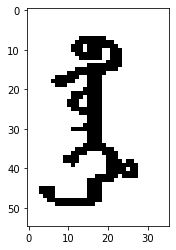

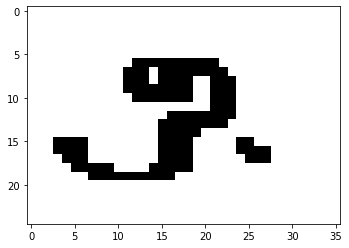

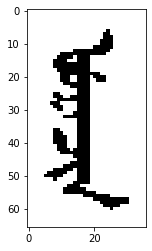

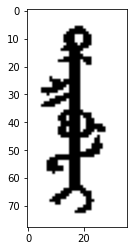

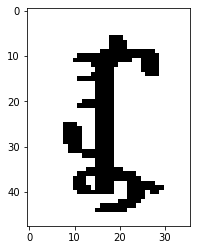

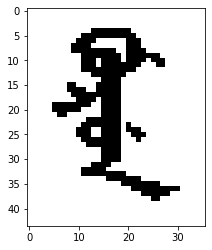

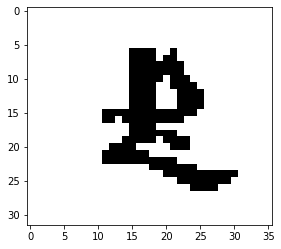

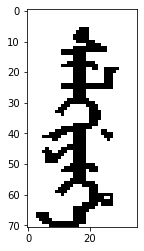

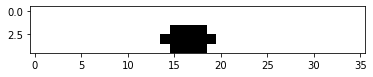

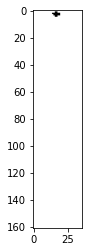

In [59]:
    wordsInLine = []
    for i in range(0, len(cutYpoints) - 1):
        cutword = scriptLines[line][cutYpoints[i]:cutYpoints[i + 1], 0:width]
        wordsInLine.append(cutword)
        filename = './img/words/manchu01-' + str(line) + '-' + str(i) + '.jpg'
        cv2.imwrite(filename, cutword)

        scriptWords.append(cutword)
        
        # Let's take a look at these words we cut
        plt.imshow(cutword, cmap = plt.get_cmap('gray'))
        plt.show()

In [60]:
print('Number of Words cut: ', len(scriptWords))

Number of Words cut:  10


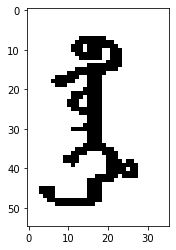

WORD: width =  36 height =  55
wordRows =  [ 0  0  0  0  0  0  0  7 10 11 10 10  9  4  9 11 10 10 10  7  5  8  7  7
  7  8  6  4  4  5  8  4  4  4  6 10  8  7 10  9  7  8 10  7  4  8  8  7
 14 10  0  0  0  0  0]


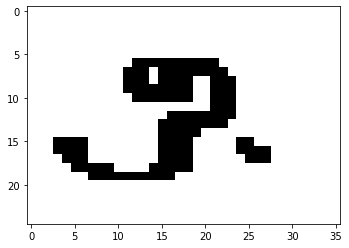

WORD: width =  36 height =  25
wordRows =  [ 0  0  0  0  0  0 10 11 10 11 10  3  8  8  5 10 12 10 10 10  0  0  0  0
  0]


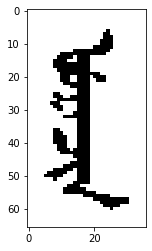

WORD: width =  36 height =  66
wordRows =  [ 0  0  0  0  0  0  1  2  3  4  4  6 11 14  9  8 11 11 10 12 11 10  8  6
  4  6  9 10  7  7  6  5  8  4  4  4  6  7  8  8  8  7  9  9  5  4  6  8
 10 10 10  5  5  4  7 10  8 11  9  5  1  0  0  0  0  0]


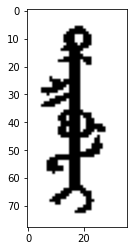

WORD: width =  36 height =  78
wordRows =  [ 0  0  0  0  0  0  3  6  8  7  7  7  8  9  8  4  5 10 11  6  4  4  4  4
  5 10 10  9 12 10  7  9 10 10  9  4  7 11 10 10 10 13 14 14 12 11  6  6
  8  8  9 11 14 11  8  8 10 10  5  4  4  4  4  5  8  8  8  7  7  4  3  5
  4  0  0  0  0  0]


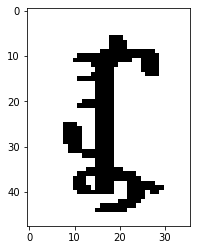

WORD: width =  36 height =  48
wordRows =  [ 0  0  0  0  0  0  3  4  4 12 18 17 10  8  8  8  4  4  4  4  7  8  4  4
  4  7  8  8  8  8  7 10  7  4  4  8 13 13 13 16 14  4  5  8  7  0  0  0]


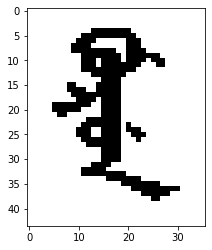

WORD: width =  36 height =  44
wordRows =  [ 0  0  0  0  8 11  7  7 13 15 14 13 11  7  4  7  9 10  8 12 10  6  7  9
 10 10  9  7  4  4  4  4  5  9  7  8 10  6  2  0  0  0  0  0]


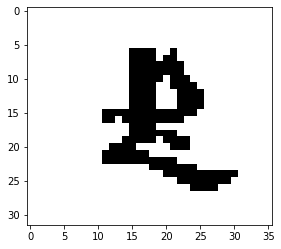

WORD: width =  36 height =  32
wordRows =  [ 0  0  0  0  0  0  5  6  8  8  8  8  8  8  8 14 11  4  7  9  7  7 11  7
 11  8  4  0  0  0  0  0]


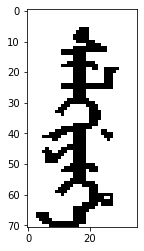

WORD: width =  36 height =  71
wordRows =  [ 0  0  0  0  0  0  3  4  5  5  6  5 11 15  8  4  4  9 12 11  8  7  7  7
 17 17  4  4  4  7 10  7  6  7  5  4  3  8 10 12 14 13  7  4  6  9 10 10
  9  8  8 11 11  4  4  5 10  9  7  7  9  6  8  9  7  5  8  8  8 14 10]


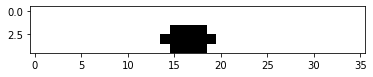

WORD: width =  36 height =  5
wordRows =  [0 0 4 6 4]


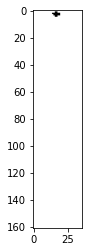

WORD: width =  36 height =  161
wordRows =  [0 2 6 5 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [62]:
for word in scriptWords:
    height, width = word.shape

    # cv2.imshow('Letter finding word', word)
    w_rows = np.full(height, 0)

    ret, w_bin = cv2.threshold(word, 0, 255,
                               cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    w_ibin = cv2.bitwise_not(w_bin)
    
    # Let's take a look at the word
    plt.imshow(w_bin, cmap = plt.get_cmap('gray'))
    plt.show()

    for i in range(height):
        w_rows[i] = cv2.countNonZero(w_ibin[i, :])

    n_letters = 0

    print("WORD: width = ", width, "height = ", height)
    print("wordRows = ", w_rows)